# Sla signalen e.d. op in hdf5 formaat

naam bestand = storedData/BearingX_Y.hd5  
key = horSignals | vertSignals | timestamps  
  
temperatuur:  
key = temperature | tempTimestamps  

In [1]:
%reload_ext autoreload
%autoreload 2
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.signal as sig

from util import util
from util.logUtil import LOG

Using TensorFlow backend.


In [2]:
macDir = '/Users/etto/Desktop/tpDatasets/'
winDir = 'E:/SAA_DATA/predictiveMaintenance/'
osDir = winDir

train_folder = osDir + 'FEMTOBearingDataSet/Learning_set/'
test_folder = osDir + 'FEMTOBearingDataSet/Test_set/Test_set/'
data_folder = '../../storedData/'

In [3]:
# pak alleen de bearings met temperatuur
train_bearings_abbr = ['1_1', '1_2', '2_1', '3_1']
test_bearings_abbr = ['1_4', '1_5', '1_6', '1_7', '2_4', '2_5', '3_3']

train_bearings = ['Bearing{:s}'.format(bearing) for bearing in train_bearings_abbr]
test_bearings = ['Bearing{:s}'.format(bearing) for bearing in test_bearings_abbr]

In [4]:
def saveAccSignalsAndTimestamp(bearing_folder, target_folder, bearing_name):
    horSignals = []
    vertSignals = []
    timestamps = []
    fileformat = 'acc_{:05d}.csv'
    column_names = ['hour', 'minute', 'second', 'micsec', 'horAcc', 'vertAcc']
    nrFiles = len(glob(bearing_folder + 'acc*csv'))
    print(bearing_folder + ': {:d} files'.format(nrFiles))
    
    for nr in range(1, nrFiles + 1):
        filename = bearing_folder + fileformat.format(nr)
        csvContents = pd.read_csv(filename,names=column_names, sep=';|,', engine='python')
        
        middleIndex = len(csvContents.index) // 2
        timestamps.append(datetime.time(hour=csvContents['hour'][middleIndex], 
                                        minute=csvContents['minute'][middleIndex], 
                                        second=csvContents['second'][middleIndex],
                                        microsecond=int(csvContents['micsec'][middleIndex])))
        
        horSignals.append(csvContents['horAcc'])
        vertSignals.append(csvContents['vertAcc'])
        
    targetFile = target_folder + bearing_name + '.hd5'
    print('saving to ' + targetFile)
    
    df = pd.DataFrame(np.array(horSignals))
    df.to_hdf(path_or_buf=targetFile, key='horSignals')
    
    df = pd.DataFrame(np.array(vertSignals))
    df.to_hdf(path_or_buf=targetFile, key='vertSignals')
    
    df = pd.DataFrame(np.array(timestamps))
    df.to_hdf(path_or_buf=targetFile, key='timestamps')

In [25]:
def saveTemperaturesAndTimestamp(bearing_folder, target_folder, bearing_name):
    signal = []
    timestamps = []
    fileformat = 'temp_{:05d}.csv'
    column_names = ['hour', 'minute', 'second', 'dsec', 'temp']
    nrFiles = len(glob(bearing_folder + 'temp*csv'))
    print(bearing_folder + ': {:d} files'.format(nrFiles))
    
    for nr in range(1, nrFiles+1):
        filename = bearing_folder + fileformat.format(nr)
        csvContents = pd.read_csv(filename,names=column_names, sep=';|,', engine='python')

        nwtimestamps = [datetime.time(hour=hr, minute=mn, second=sc, microsecond=int(ms*1e5)) 
                        for (hr,mn,sc,ms) in zip(csvContents['hour'],csvContents['minute'], csvContents['second'],
                                                csvContents['dsec'])]
        signal.append(csvContents['temp'])
        timestamps.append(nwtimestamps)
    
        
    targetFile = target_folder + bearing_name + '.hd5'
    print('saving to ' + targetFile)
    
    df = pd.DataFrame(np.array(signal))
    df.to_hdf(path_or_buf=targetFile, key='temperature')
    
    df = pd.DataFrame(np.array(timestamps))
    df.to_hdf(path_or_buf=targetFile, key='tempTimestamps')    


In [26]:
target_folder = '../../storedData/'
for bearing_name in train_bearings:
    bearing_folder = train_folder + bearing_name + '/'
    saveTemperaturesAndTimestamp(bearing_folder=bearing_folder, bearing_name=bearing_name, target_folder=target_folder)

for bearing_name in test_bearings:
    bearing_folder = test_folder + bearing_name + '/'
    saveTemperaturesAndTimestamp(bearing_folder=bearing_folder, bearing_name=bearing_name, target_folder=target_folder)

E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Learning_set/Bearing1_1/: 466 files
saving to ../../storedData/Bearing1_1.hd5


C:\Users\Etto\Anaconda2\envs\py36DL\lib\site-packages\pandas\core\generic.py:1993: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->[0]]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Learning_set/Bearing1_2/: 144 files
saving to ../../storedData/Bearing1_2.hd5
E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Learning_set/Bearing2_1/: 151 files
saving to ../../storedData/Bearing2_1.hd5
E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Learning_set/Bearing3_1/: 89 files
saving to ../../storedData/Bearing3_1.hd5
E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/Bearing1_4/: 188 files
saving to ../../storedData/Bearing1_4.hd5
E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/Bearing1_5/: 383 files
saving to ../../storedData/Bearing1_5.hd5
E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/Bearing1_6/: 383 files
saving to ../../storedData/Bearing1_6.hd5
E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/Bearing1_7/: 250 files
saving to ../../storedData/Bearing1_7.hd5
E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Tes

## testje of temperatuur goed is opgeslagen

In [38]:
len(timestamps[0])

151

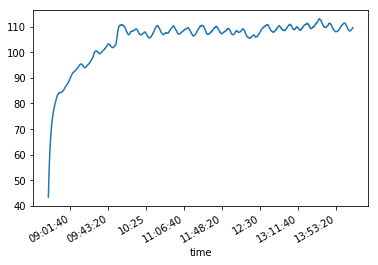

In [56]:
bname = 'Bearing2_5'
pob = target_folder + bname + '.hd5'
temps = pd.read_hdf(path_or_buf=pob, key='temperature')
timestamps = pd.read_hdf(path_or_buf=pob, key='tempTimestamps')

allstamps = np.array([])
alltemps = np.array([])
for i in range(len(timestamps[0])):
    allstamps = np.append(allstamps, timestamps[0][i])
    alltemps = np.append(alltemps, temps[0][i])
plt.plot(allstamps, alltemps)
plt.gcf().autofmt_xdate()

    

In [57]:
len(allstamps)

200107

## maak spectrogram en sla die op

In [18]:
def storeSpectrogram(filename):
    LOG('creating spectrogram for ' + filename, printLog=True)
    LOG('horizontal', printLog=True)
    horAccDf = pd.read_hdf(path_or_buf=filename, key='horSignals')
    horSig = np.array([])
    for i,row in horAccDf.iterrows():
        horSig = np.append(horSig, row)
    f, t, Sxx = sig.spectrogram(horSig, fs=25600, nperseg=2560, noverlap=0)
    pd.DataFrame(Sxx.T).to_hdf(path_or_buf=filename, key='horSpec') 
    pd.DataFrame(f).to_hdf(path_or_buf=filename, key='horF') 
    pd.DataFrame(t).to_hdf(path_or_buf=filename, key='horT') 
    
    LOG('vertical', printLog=True)
    vertAccDf = pd.read_hdf(path_or_buf=filename, key='vertSignals')
    vertSig = np.array([])
    for i,row in vertAccDf.iterrows():
        vertSig = np.append(vertSig, row)
    f, t, Sxx = sig.spectrogram(vertSig, fs=25600, nperseg=2560, noverlap=0)
    pd.DataFrame(Sxx.T).to_hdf(path_or_buf=filename, key='vertSpec') 
    pd.DataFrame(f).to_hdf(path_or_buf=filename, key='vertF') 
    pd.DataFrame(t).to_hdf(path_or_buf=filename, key='vertT') 
    

In [110]:
for bearing_name in train_bearings:
    filename = data_folder + bearing_name + '.hd5'
    storeSpectrogram(filename)
    
for bearing_name in test_bearings:
    filename = data_folder + bearing_name + '.hd5'
    storeSpectrogram(filename)

creating spectrogram for ../../storedData/Bearing1_1.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing1_2.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing2_1.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing3_1.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing1_4.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing1_5.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing1_6.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing1_7.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing2_4.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing2_5.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing3_3.hd5
horizontal
vertical


In [97]:
bearing_name = 'Bearing1_1'
filename = data_folder + bearing_name + '.hd5'

horAccDf = pd.read_hdf(path_or_buf=filename, key='horSignals')
horSig = np.array([])
for i,row in horAccDf.iterrows():
    horSig = np.append(horSig, row)
f, t, Sxx = sig.spectrogram(horSig, fs=25600, nperseg=2560, noverlap=0)

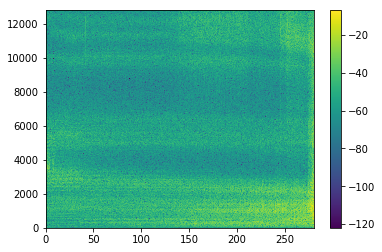

In [100]:
plt.pcolormesh(t,f,10 * np.log10(Sxx))
plt.colorbar()
plt.show()

In [101]:
%store -r signal_1_1_hor
from util import util
spec = util.getSpectro(signal_1_1_hor)
f, t, S2xx = sig.spectrogram(signal_1_1_hor, fs=25600, nperseg=2560, noverlap=0)

In [88]:
np.shape(Sxx)

(1281, 2803)

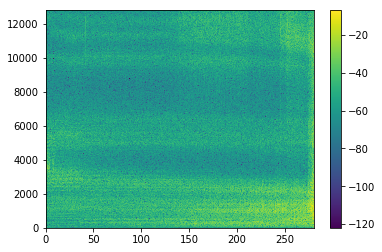

In [96]:
plt.pcolormesh(t,f,10 * np.log10(Sxx))
plt.colorbar()
plt.show()

In [102]:
np.max(S2xx - Sxx)

0.0

In [106]:
LOG('boe',printLog=True)

boe


## ook van overige signalen alles opslaan

In [15]:
train_bearings_abbr = ['2_2', '3_2']
test_bearings_abbr = ['1_3', '2_3', '2_6', '2_7']

train_bearings = ['Bearing{:s}'.format(bearing) for bearing in train_bearings_abbr]
test_bearings = ['Bearing{:s}'.format(bearing) for bearing in test_bearings_abbr]

In [16]:
target_folder = '../../storedData/'
for bearing_name in train_bearings:
    bearing_folder = train_folder + bearing_name + '/'
    saveAccSignalsAndTimestamp(bearing_folder=bearing_folder, bearing_name=bearing_name, target_folder=target_folder)

for bearing_name in test_bearings:
    bearing_folder = test_folder + bearing_name + '/'
    saveAccSignalsAndTimestamp(bearing_folder=bearing_folder, bearing_name=bearing_name, target_folder=target_folder)

E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Learning_set/Bearing2_2/: 797 files
saving to ../../storedData/Bearing2_2.hd5


C:\Users\Etto\Anaconda2\envs\py36DL\lib\site-packages\pandas\core\generic.py:1993: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->[0]]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Learning_set/Bearing3_2/: 1637 files
saving to ../../storedData/Bearing3_2.hd5
E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/Bearing1_3/: 1802 files
saving to ../../storedData/Bearing1_3.hd5
E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/Bearing2_3/: 1202 files
saving to ../../storedData/Bearing2_3.hd5
E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/Bearing2_6/: 572 files
saving to ../../storedData/Bearing2_6.hd5
E:/SAA_DATA/predictiveMaintenance/FEMTOBearingDataSet/Test_set/Test_set/Bearing2_7/: 172 files
saving to ../../storedData/Bearing2_7.hd5


In [19]:
for bearing_name in train_bearings:
    filename = data_folder + bearing_name + '.hd5'
    storeSpectrogram(filename)
    
for bearing_name in test_bearings:
    filename = data_folder + bearing_name + '.hd5'
    storeSpectrogram(filename)

creating spectrogram for ../../storedData/Bearing2_2.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing3_2.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing1_3.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing2_3.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing2_6.hd5
horizontal
vertical
creating spectrogram for ../../storedData/Bearing2_7.hd5
horizontal
vertical
